# 1.Import library and load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from xgboost import XGBRegressor

In [2]:
result = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/machine learning project/Score models.xlsx")

In [3]:
result

,Name of models,RMSE,R2 score
0,Lasso,0.221936,0.967581
1,KNN,0.389714,0.867664
2,Ridge,0.226031,0.966999
3,Decision Tree,0.195501,0.975741
4,Random Forest,0.110256,0.992098
5,Adaboost,0.127482,0.989428
6,XGBoost,0.070138,0.996874
7,LightGBM,0.097354,0.993988
8,Stacking,0.078055,0.996202


# **2.Summary result**

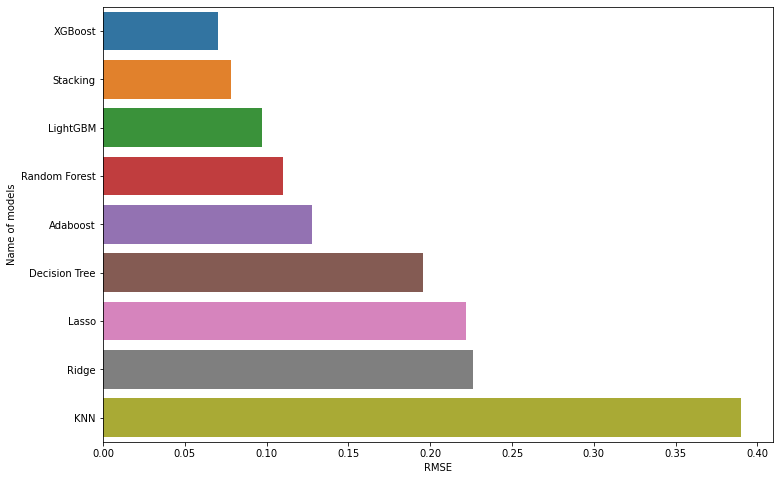

In [4]:
# barplot for root mean squared error of 9 models
plt.figure(figsize = (12,8))
sns.barplot(x = 'RMSE', y = 'Name of models' , data = result.sort_values('RMSE'));

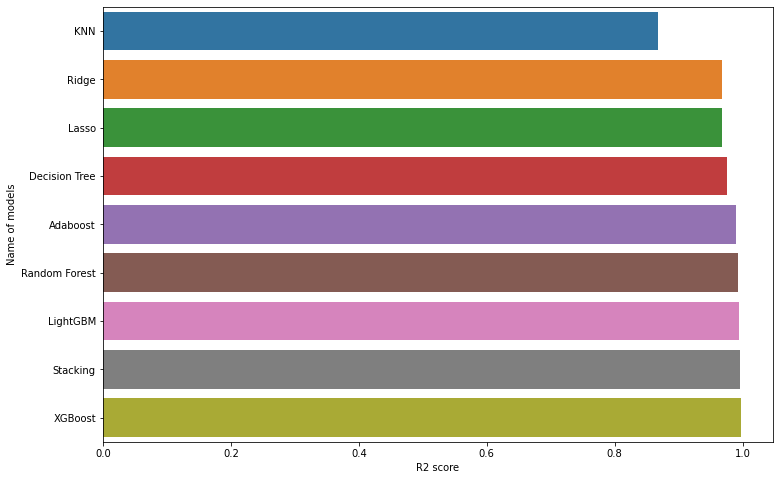

In [5]:
# barplot for r2_score of 9 models
plt.figure(figsize = (12,8))
sns.barplot(x = 'R2 score', y = 'Name of models' , data = result.sort_values('R2 score'));

=> we can see that: XGBoost has has the smallest RMSE and the largest R2_score 
=> XGBoost is best model 

# **3.Analysis with best model**

## 1.Training with best model and its best parameter

In [6]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/machine learning project/processed data.csv")
data = data.drop(columns = ['Unnamed: 0'])

# Comp = name of league
data['Comp'].replace(data['Comp'].unique(),[1, 3, 2, 4, 5], inplace=True)
# drop name column and preferred_foot
data = data.drop(columns = ['name','preferred_foot'])

#convert the categorical variables to dummies
data = pd.get_dummies(data) 
# log tranformation for market vakue
data['market value'] = np.log(data['market value'])

data_build = data.copy()
y = data_build['market value']
x = data_build.drop(columns =['market value'])
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.33, random_state = 3 )

#  Training model with hyperparameter tuning
model = XGBRegressor(n_estimators = 2000, learning_rate = 0.03, gamma = 0.0, max_depth = 3  )
model.fit(x_train, y_train)
y_pre = model.predict(x_test)
print('Root mean squared' ,(mean_squared_error(y_pre,y_test )**(1/2)))
print('R2-scored ', r2_score(y_pre, y_test))

[06:19:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root mean squared 0.07013753747205126
R2-scored  0.9968735027541525


## 2. Evaluation with actual values

Because we use log transformation technique for market value variables, so we need to evaluate actual values with best model

In [7]:
y_actual = np.exp(y_test.values)
y_predicted_for_actual = np.exp(y_pre)


In [8]:
# mean squared error and R2 score for actual values and predicted values

print('Root mean squared error : ' ,(mean_squared_error(y_actual, y_predicted_for_actual )**(1/2)))
print('R2-score :  ', r2_score(y_actual, y_predicted_for_actual))

Root mean squared error :  1373136.7151043897
R2-score :   0.9940817312005764


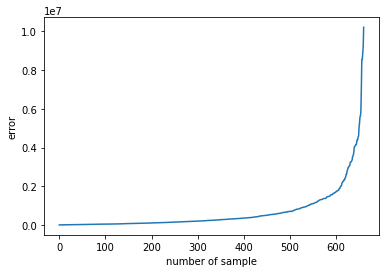

In [9]:
# plot the error between actual values and predicted values
error = abs(y_predicted_for_actual - y_actual)
error = np.sort(error)
plt.plot(range(error.shape[0]), error, label="Predict")
plt.xlabel("number of sample")
plt.ylabel('error')
plt.show()

 we can see that : we have approximately 610 player prices that the error of its prediction < 2 million euro. 

Finally , I use a new metric to calculate the percentage of error of player prices:

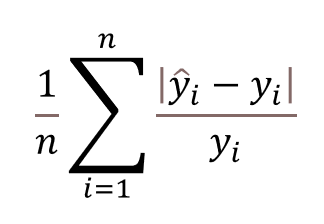

In [10]:
error = abs(y_predicted_for_actual - y_actual)
percet_each_layer = error / y_actual
percent = sum(percet_each_layer) / len(percet_each_layer)* 100
print('percentage of error of player prices : ', percent ,'%')

percentage of error of player prices :  5.424107721238021 %


=> it means that : If a player is really worth 100 million euros, our best model would predict that player's value between 100 - 5.4 million euros to 100 + 5.4 million euros